In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.5)

import statsmodels

In [2]:
df = pd.read_csv('coinist_labelled2.csv', index_col=0)

In [3]:
df.head()

,Name,ico_date,ico_px,current_px,ico_roi_2,bull_bear,year,month,log_roi,log_roi_2,bull_bear_purg,life_years,life_months,life_years_rd
0,Rise,6/1/2016,0.52978,0.080822,-0.8474,NaN,2016,6,1.000000,-0.165582,2,2.0,24,2
1,B2BX,11/1/2017,0.74000,0.336894,-0.5447,NaN,2017,11,1.000000,-0.607520,2,0.6,6,0
2,Bonpay,11/1/2017,0.85369,0.250486,-0.7066,NaN,2017,11,1.000000,-0.347291,2,0.6,6,0
3,BAT,5/1/2017,0.03500,0.311497,7.8999,1.0,2017,5,2.066850,2.066850,1,1.1,13,1
4,Raiden Network Token,11/1/2017,0.67000,1.391090,1.0763,NaN,2017,11,0.073529,0.073529,2,0.6,6,0


List of test:  
1) Does ICO perform statistically different in Bull market? (Control is all population average)
2) Does ICO perform statistically different in Bear market? (Control is all population average)
3) Does ICO perform statistically different in bull vs. bear market 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 295
Data columns (total 14 columns):
Name              457 non-null object
ico_date          458 non-null object
ico_px            457 non-null float64
current_px        457 non-null float64
ico_roi_2         457 non-null float64
bull_bear         314 non-null float64
year              458 non-null int64
month             458 non-null int64
log_roi           457 non-null float64
log_roi_2         457 non-null float64
bull_bear_purg    458 non-null int64
life_years        458 non-null float64
life_months       458 non-null int64
life_years_rd     458 non-null int64
dtypes: float64(7), int64(5), object(2)
memory usage: 53.7+ KB


In [4]:
#obtain means as baseline

bull_mean = np.mean(df['ico_roi_2'].loc[df['bull_bear_purg'] == 1])
bear_mean = np.mean(df['ico_roi_2'].loc[df['bull_bear_purg'] == 0])
purg_mean = np.mean(df['ico_roi_2'].loc[df['bull_bear_purg'] == 2])
population_mean = np.mean(df['ico_roi_2'])
print(bull_mean)
print(bear_mean)
print(purg_mean)
print(population_mean)


bull_std = np.std(df['ico_roi_2'].loc[df['bull_bear_purg'] == 1])
bear_std = np.std(df['ico_roi_2'].loc[df['bull_bear_purg'] == 0])
purg_std = np.std(df['ico_roi_2'].loc[df['bull_bear_purg'] == 2])
population_std = np.std(df['ico_roi_2'])
print(bull_std)
print(bear_std)
print(purg_std)
print(population_std)

5.58104476744186
7.71489160839161
190.43725281690143
63.68765667396062
35.0151918351799
59.2856921161917
1959.042011992316
1096.04183283271


In [5]:
#diff in bull vs bear

diff_means = bear_mean - bull_mean
print(diff_means)

2.13384684094975


In [6]:
#obtain means as baseline of log_rois

log_bull_mean = np.mean(df['log_roi_2'].loc[df['bull_bear_purg'] == 1])
log_bear_mean = np.mean(df['log_roi_2'].loc[df['bull_bear_purg'] == 0])
log_purg_mean = np.mean(df['log_roi_2'].loc[df['bull_bear_purg'] == 2])
log_population_mean = np.mean(df['log_roi_2'])
print(log_bull_mean)
print(log_bear_mean)
print(log_purg_mean)
print(log_population_mean)


log_bull_std = np.std(df['log_roi_2'].loc[df['bull_bear_purg'] == 1])
log_bear_std = np.std(df['log_roi_2'].loc[df['bull_bear_purg'] == 0])
log_purg_std = np.std(df['log_roi_2'].loc[df['bull_bear_purg'] == 2])
log_population_std = np.std(df['log_roi_2'])
print(log_bull_std)
print(log_bear_std)
print(log_purg_std)
print(log_population_std)

-0.16980307315697674
-0.046344336167832186
0.2645141214295775
0.0037803864070021865
1.590121569342989
1.3976047990223293
1.9112577852617136
1.652615118995617


In [7]:
#Is the distribution of ROIs in  market Gaussian?

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [8]:
roi_samples = np.random.normal(population_mean, population_std, size=10000)

x_temp, y_temp = ecdf(df['ico_roi_2'])
x_theor, y_theor = ecdf(roi_samples)

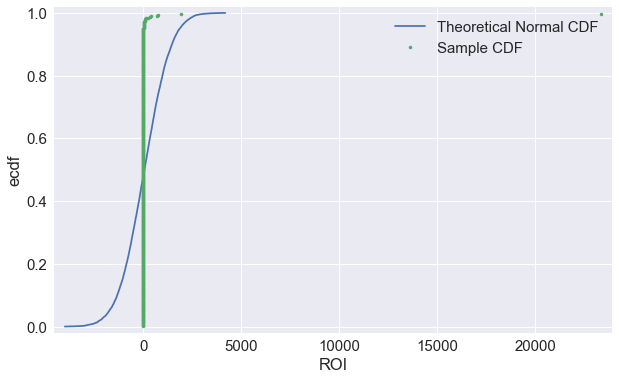

In [94]:

fig, ax = plt.subplots(figsize=(10,6))
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x_temp, y_temp, marker='.', linestyle='none')
_ = plt.xlabel('ROI')
_ = plt.ylabel('ecdf')
_ = plt.legend(['Theoretical Normal CDF', 'Sample CDF'])
plt.margins(0.02)
plt.show()

In [9]:
log_roi_samples = np.random.normal(log_population_mean, log_population_std, size=10000)

log_x_temp, log_y_temp = ecdf(df['log_roi_2'])
log_x_theor, log_y_theor = ecdf(log_roi_samples)

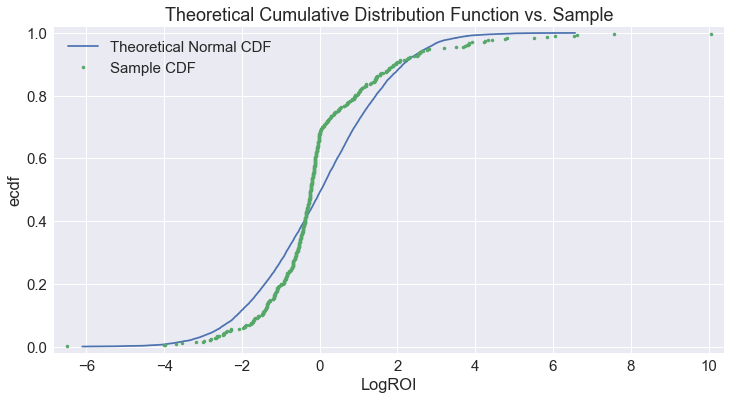

In [97]:

fig, ax = plt.subplots(figsize=(12,6))
_ = plt.plot(log_x_theor, log_y_theor)
_ = plt.plot(log_x_temp, log_y_temp, marker='.', linestyle='none')
_ = plt.title('Theoretical Cumulative Distribution Function vs. Sample')
_ = plt.xlabel('LogROI')
_ = plt.ylabel('ecdf')
_ = plt.legend(['Theoretical Normal CDF', 'Sample CDF'])
plt.margins(0.02)
plt.show()

In [12]:
#Going forward will use the Logarithmic ROI

In [93]:
# get samples of bear, bull and purg
np.random.seed(42)

n = 100

bull_samp = np.random.choice(df['log_roi_2'].loc[df['bull_bear_purg'] == 1], size=n, replace=True)
bear_samp = np.random.choice(df['log_roi_2'].loc[df['bull_bear_purg'] == 0], size=n, replace=True)
purg_samp = np.random.choice(df['log_roi_2'].loc[df['bull_bear_purg'] == 2], size=n, replace=True)

In [94]:
bull_samp_mean = np.mean(bull_samp)
print(bull_samp_mean)

bear_samp_mean = np.mean(bear_samp)
print(bear_samp_mean)

purg_samp_mean = np.mean(purg_samp)
print(purg_samp_mean)

-0.19817668596000002
-0.038474426460000016
0.33583534668


In [31]:
bull_samp_std = np.std(bull_samp)
print(bull_samp_std)

bear_samp_std = np.std(bear_samp)
print(bear_samp_std)

purg_samp_std = np.std(purg_samp)
print(purg_samp_std)

1.5945173364603518
1.5537125497993591
1.9831732532131165


In [85]:
#samp diffs

sample_diff = np.subtract(bull_samp_mean,bear_samp_mean)
print(sample_diff)

-0.1597022595


In [42]:
# construct confidence interval... use 95% confidence or alpha of 0.05. Since one-tailed test, critical z-value = 1.64
bull_samp_std_err = (bull_samp_std**2/100)
bear_samp_std_err = (bear_samp_std**2/100)
purg_samp_std_err = (purg_samp_std**2/100)
standard_error = bull_samp_std_err + bear_samp_std_err
standard_error = standard_error**0.5
print(standard_error)

0.22263216801883415


In [43]:
interval = 1.64*standard_error
print(interval)

0.36511675555088796


In [113]:
confidence_interval_lower_bound = sample_diff - interval
confidence_interval_upper_bound = sample_diff + interval
print('The 95% Confidence Interval for a Distribution of Mean Differences is between {:.2} and {:.2}'.format(confidence_interval_lower_bound, confidence_interval_upper_bound))

The 95% Confidence Interval for a Distribution of Mean Differences is between -0.52 and 0.21


H0 = bull_mean - bear_mean = 0

Ha = bull_mean - bear_mean > 0 (ICOs perform better in bull markets than in bear markets)

Significance Level of 95% or Alpha of 0.05

Critical value = 1.64 (one-tailed case)

We reject H0 if z-stat > 1.64 and fail to reject if z-stat < 1.64

In [44]:
#manual compute z-stat and compare with statsmodels.

manual_z_stat = sample_diff / standard_error
print(manual_z_stat)

-0.7173368562196707


In [17]:
from statsmodels.stats import weightstats

In [110]:
zstat, pval = statsmodels.stats.weightstats.ztest(bull_samp, bear_samp, value=0)

In [111]:
print(zstat)
print(pval)

-0.71374116011213
0.4753872496948548


With a z-stat of -0.71 (within of 95% confidence interval), we reject the Null hypothesis in favor of the alternative.

In [56]:
#What else to test...

# 2) Purg vs. non-purg

H0 = Non-purg mean - Purgatory Mean = 0
Ha = Non-purg mean - Purgatory Mean != 0 (two-tailed test)

non_purg_samp = np.random.choice(df['log_roi_2'].loc[df['bull_bear_purg'] != 2], size=n, replace=True)

In [64]:
non_purg_samp_mean = np.mean(non_purg_samp)
print(non_purg_samp_mean)
non_purg_samp_std = np.std(non_purg_samp)
print(non_purg_samp_std)

non_purg_samp_var = (non_purg_samp_std**2/100)
standard_error = non_purg_samp_var + purg_samp_var
standard_error = standard_error**0.5
print(standard_error)



sample_diff = non_purg_samp_mean - purg_samp_mean
print(sample_diff)

#first at 95% confidence interval, so alpha of 0.05 (div 2 as two-tailed test). z-value = 1.96

interval_4 = 1.96*standard_error

low_interval = sample_diff - interval_4
high_interval = sample_diff + interval_4
print(low_interval)
print(high_interval)

-0.08204238844
1.3590878875271346
0.24041830292810207
-0.41787773512
-0.8890976088590801
0.05334213861908005


In [91]:
zstat, pval = statsmodels.stats.weightstats.ztest(non_purg_samp, purg_samp, value=0)

In [92]:
print(zstat)
print(pval)

-1.7294153216583894
0.08373478977052302


In [66]:
#manual calc of z stat

purg_z_stat = sample_diff / standard_error
print(purg_z_stat)

-1.7381277965553554


As -1.73 falls in the critical region, we reject H0 in favor of Ha

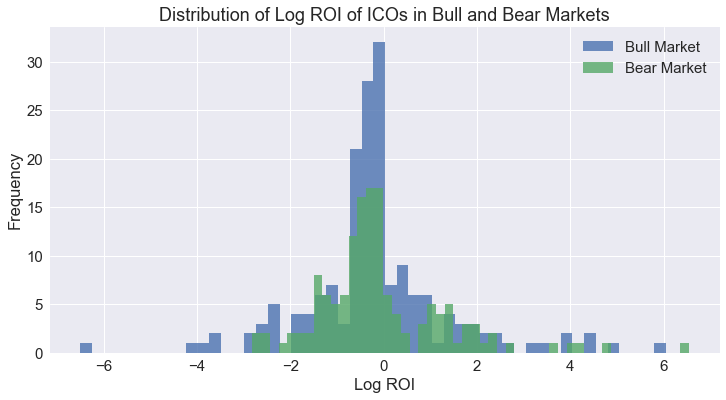

In [78]:
fig, ax = plt.subplots(figsize=(12,6))
ax = df['log_roi_2'].loc[df['bull_bear_purg'] ==1].hist(bins=50, label='Bull Market', alpha=0.8)

ax = df['log_roi_2'].loc[df['bull_bear_purg'] ==0].hist(bins=50, label='Bear Market', alpha=0.8)

plt.title('Distribution of Log ROI of ICOs in Bull and Bear Markets')
plt.ylabel('Frequency')
plt.xlabel('Log ROI')
plt.legend()
plt.show()

In [20]:
zstat_pop, pval_pop = statsmodels.stats.weightstats.ztest(df['log_roi_2'].loc[df['bull_bear_purg'] ==0][:100], df['log_roi_2'].loc[df['bull_bear_purg'] ==1][:100], value=0)

In [21]:
print(zstat_pop)
print(pval_pop)

0.7995349055889244
0.4239803151387397


In [79]:
df['bull_bear_purg'].value_counts()

1    173
0    143
2    142
Name: bull_bear_purg, dtype: int64

In [88]:
from scipy import stats

In [90]:
stats.ttest_ind(bull_samp, bear_samp, axis=0, equal_var=0)

Ttest_indResult(statistic=-0.7137411601121301, pvalue=0.4762282870354907)

With t-test, pval is 1 - (0.476/2) or not statistically significant. t-stat denotes magnitude of difference

In [104]:
np.random.seed(42)
bull_samp_2 = np.random.choice(df['ico_roi_2'].loc[df['bull_bear_purg'] == 1], size=n, replace=True)
bear_samp_2 = np.random.choice(df['ico_roi_2'].loc[df['bull_bear_purg'] == 0], size=n, replace=True)
purg_samp_2 = np.random.choice(df['ico_roi_2'].loc[df['bull_bear_purg'] == 2], size=n, replace=True)

In [105]:
bull_samp_2_mean = np.mean(bull_samp_2)
print(bull_samp_2_mean)
bear_samp_2_mean = np.mean(bear_samp_2)
print(bear_samp_2_mean)

6.530453
10.966391000000002


In [106]:
bull_samp_2_std = np.std(bull_samp_2)
print(bull_samp_2_std)
bear_samp_2_std = np.std(bear_samp_2)
print(bear_samp_2_std)

43.3524588690779
70.71954988689068


In [107]:
zstat_2, pval_2 = statsmodels.stats.weightstats.ztest(bull_samp_2, bear_samp_2, value=0)

In [108]:
print(zstat_2)
print(pval_2)

-0.5320923995449396
0.5946620011973887
